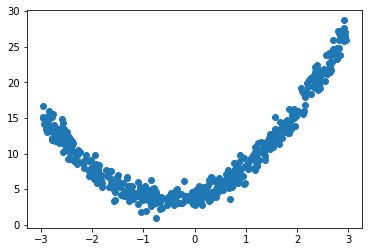

In [14]:
#let's generate X, Y
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(42)
m = 500
X = 6 * np.random.rand(m, 1) - 3
Y = 2 * X**2 + 2 * X + 4 + np.random.randn(m, 1)

plt.scatter(X, Y)
plt.show()



In [15]:
#define training sizes
training_sizes = [1, 20, 50, 100, 160]

In [16]:
#next, we try different models and look at their learning curves

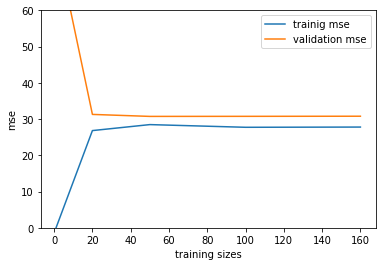

In [17]:
#Start with LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lin_reg = LinearRegression()
training_sizes, training_scores, validation_scores = learning_curve(lin_reg,
                                                                    X,
                                                                    Y, 
                                                                    train_sizes = training_sizes, 
                                                                    cv=5, 
                                                                    scoring='neg_mean_squared_error')

training_mse_scores = -training_scores.mean(axis=1)
validation_mse_scores = -validation_scores.mean(axis=1)

plt.plot(training_sizes, training_mse_scores, label="trainig mse")
plt.plot(training_sizes, validation_mse_scores, label='validation mse')
plt.xlabel("training sizes")
plt.ylabel('mse')
plt.ylim(0, 60)
plt.legend()
plt.show()


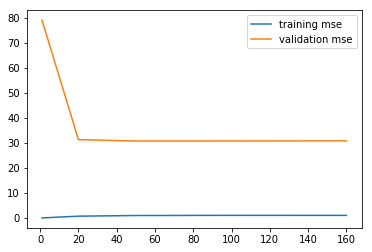

In [34]:
#let's train Polynomial regression and plot its learning curve
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_feature.fit_transform(X)
lin_reg = LinearRegression()

training_sizes, training_scores, valdiation_scores = learning_curve(lin_reg,
                                                                    x_poly,
                                                                    Y, 
                                                                    train_sizes = training_sizes, 
                                                                    cv=5,
                                                                    scoring='neg_mean_squared_error')
training_mse_means = -training_scores.mean(axis=1)
validation_mse_means = -validation_scores.mean(axis=1)

plt.plot(training_sizes, training_mse_means, label="training mse")
plt.plot(training_sizes, validation_mse_means, label='validation mse')
plt.legend()